In [ ]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy.stats import skew
from scipy.stats import boxcox

# Sklearn preprocessing & feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Dataset splitting
from sklearn.model_selection import train_test_split

# Model selection & tuning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, roc_auc_score)

#Model Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# Load dataset
# -----------------------------

df = pd.read_csv('Data/Wisconsin Breast Cancer Dataset_cleaned.csv')
print(df.head(5))
print(df.shape)

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

In [68]:
X = df.drop('target', axis=1)
y = df['target']

In [69]:
# -----------------------------
# Fix skewness
# -----------------------------
for col in X.columns:
    if (X[col] > 0).all():
        if abs(skew(X[col])) > 1:
            X[col], _ = boxcox(X[col] + 1)  # Box-Cox only works on positive values

In [70]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
selector = SelectKBest(f_classif, k=15)  # choose top 15 features
X_selected = selector.fit_transform(X_scaled, y)

print("Selected Features:")
print(X.columns[selector.get_support()])

Selected Features:
Index(['mean_radius', 'mean_perimeter', 'mean_area', 'mean_compactness',
       'mean_concavity', 'mean_concave_points', 'radius_error',
       'perimeter_error', 'area_error', 'worst_radius', 'worst_perimeter',
       'worst_area', 'worst_compactness', 'worst_concavity',
       'worst_concave_points'],
      dtype='object')


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

Logistic Regression Results - Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158
Precision: 0.9726027397260274
Recall: 0.9861111111111112
F1 Score: 0.9793103448275862
ROC AUC: 0.9894179894179895


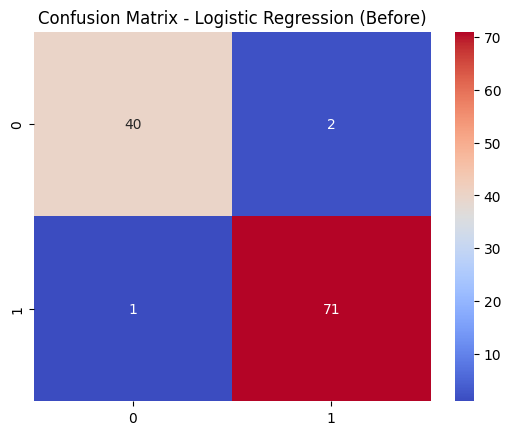

In [73]:
# -----------------------------
# Logistic Regression - Before Hyperparameter Tuning
# -----------------------------
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

print("Logistic Regression Results - Before Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap="coolwarm")
plt.title("Confusion Matrix - Logistic Regression (Before)")
plt.show()

Decision Tree Results - Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Accuracy: 0.9210526315789473
Precision: 0.9565217391304348
Recall: 0.9166666666666666
F1 Score: 0.9361702127659575
ROC AUC: 0.9226190476190476


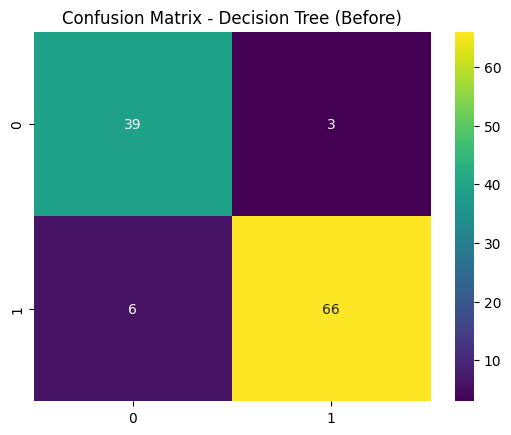

In [74]:
# -----------------------------
# Decision Tree - Before Hyperparameter Tuning
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

print("Decision Tree Results - Before Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="viridis")
plt.title("Confusion Matrix - Decision Tree (Before)")
plt.show()

Random Forest Results - Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193
Precision: 0.958904109589041
Recall: 0.9722222222222222
F1 Score: 0.9655172413793104
ROC AUC: 0.9914021164021164


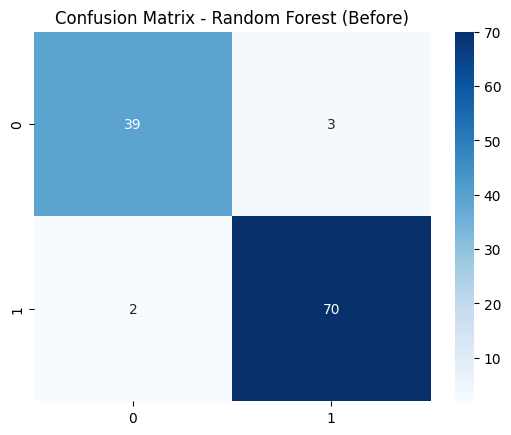

In [75]:
# -----------------------------
# Random Forest - Before Hyperparameter Tuning
# -----------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Results - Before Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Before)")
plt.show()

Gradient Boosting Results - Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy: 0.9385964912280702
Precision: 0.9452054794520548
Recall: 0.9583333333333334
F1 Score: 0.9517241379310345
ROC AUC: 0.9904100529100529


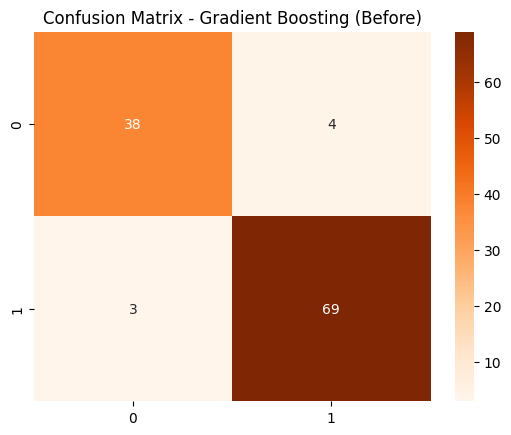

In [76]:
# -----------------------------
# Gradient Boosting - Before Hyperparameter Tuning
# -----------------------------
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

print("Gradient Boosting Results - Before Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_gb))

sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap="Oranges")
plt.title("Confusion Matrix - Gradient Boosting (Before)")
plt.show()

XGBoost Results - Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193
Precision: 0.9466666666666667
Recall: 0.9861111111111112
F1 Score: 0.9659863945578231
ROC AUC: 0.9923941798941799


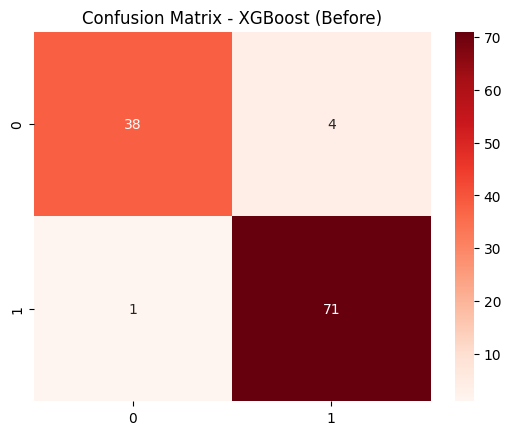

In [77]:
# -----------------------------
# XGBoost - Before Hyperparameter Tuning
# -----------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGBoost Results - Before Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap="Reds")
plt.title("Confusion Matrix - XGBoost (Before)")
plt.show()

KNN Results - Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy: 0.9385964912280702
Precision: 0.9577464788732394
Recall: 0.9444444444444444
F1 Score: 0.951048951048951
ROC AUC: 0.9743716931216931


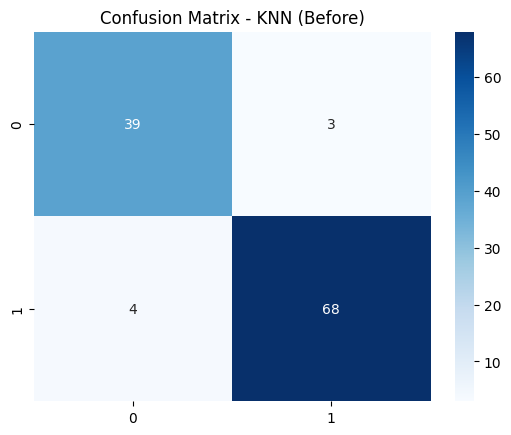

In [78]:
# -----------------------------
# K-Nearest Neighbors - Before Hyperparameter Tuning
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:,1]

print("KNN Results - Before Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - KNN (Before)")
plt.show()

SVM Results - Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315
Precision: 0.9583333333333334
Recall: 0.9583333333333334
F1 Score: 0.9583333333333334
ROC AUC: 0.9907407407407407


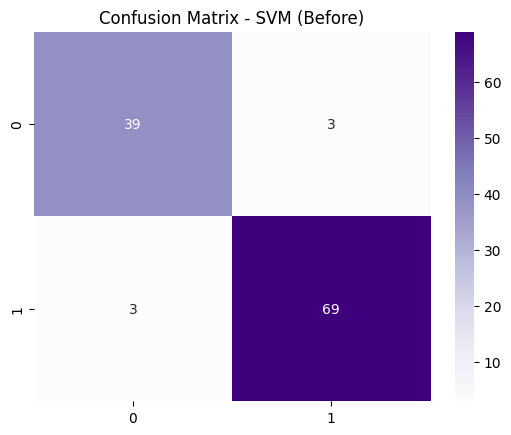

In [79]:
# -----------------------------
# Support Vector Machine - Before Hyperparameter Tuning
# -----------------------------
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:,1]

print("SVM Results - Before Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svm))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap="Purples")
plt.title("Confusion Matrix - SVM (Before)")
plt.show()

In [81]:
# -----------------------------
# Collect Metrics - Before Hyperparameter Tuning
# -----------------------------
results_before = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "KNN",
        "XGBoost",
        "SVM"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_svm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_svm)
    ],
    "F1": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_svm)
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb),
        roc_auc_score(y_test, y_prob_knn),
        roc_auc_score(y_test, y_prob_xgb),
        roc_auc_score(y_test, y_prob_svm)
    ]
}

# Create DataFrame
results_before_df = pd.DataFrame(results_before)

# Sort by ROC AUC descending
results_before_df = results_before_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

print("📊 Model Comparison Table - Before Hyperparameter Tuning:")
print(results_before_df)

📊 Model Comparison Table - Before Hyperparameter Tuning:
                 Model  Accuracy  Precision    Recall        F1   ROC AUC
0              XGBoost  0.956140   0.946667  0.986111  0.965986  0.992394
1        Random Forest  0.956140   0.958904  0.972222  0.965517  0.991402
2                  SVM  0.947368   0.958333  0.958333  0.958333  0.990741
3    Gradient Boosting  0.938596   0.945205  0.958333  0.951724  0.990410
4  Logistic Regression  0.973684   0.972603  0.986111  0.979310  0.989418
5                  KNN  0.938596   0.957746  0.944444  0.951049  0.974372
6        Decision Tree  0.921053   0.956522  0.916667  0.936170  0.922619


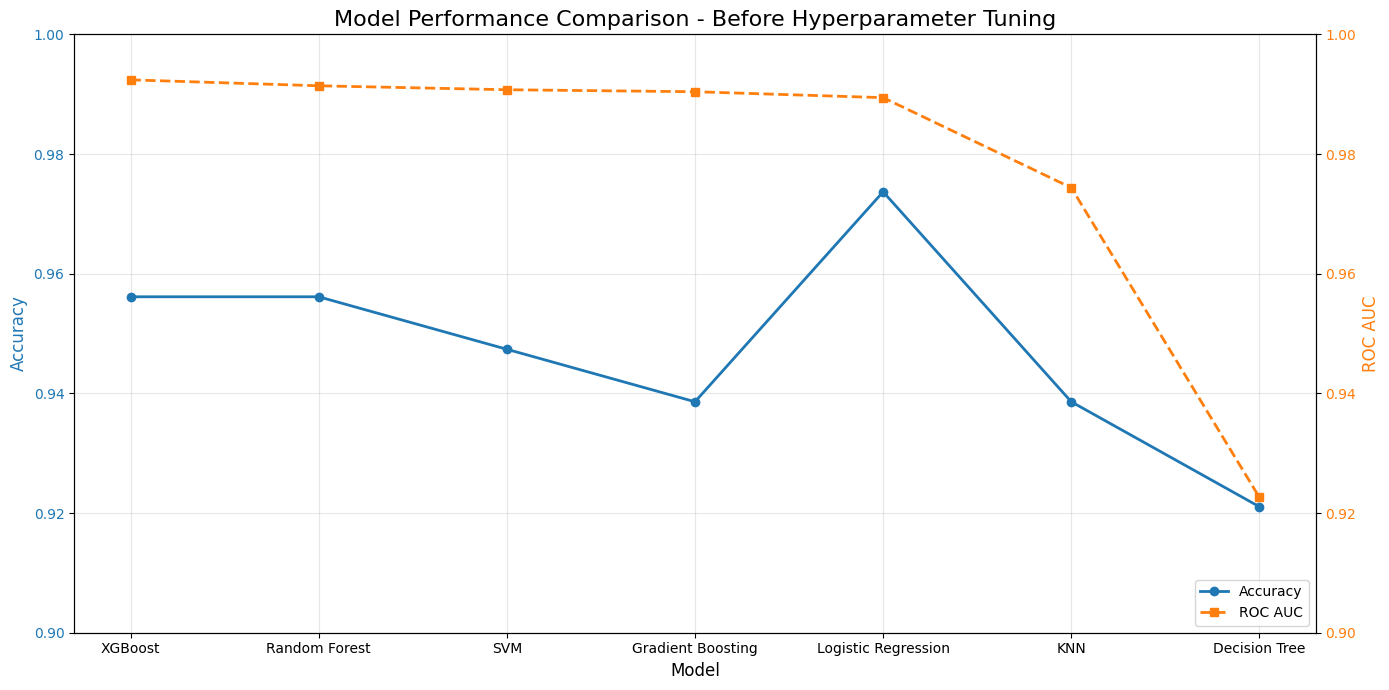

In [93]:
fig, ax1 = plt.subplots(figsize=(14,7))  # wider for clarity

# Primary axis: Accuracy
color_acc = "tab:blue"
ax1.set_xlabel("Model", fontsize=12)
ax1.set_ylabel("Accuracy", color=color_acc, fontsize=12)
ax1.plot(results_before_df["Model"], results_before_df["Accuracy"], marker="o", color=color_acc, linewidth=2, label="Accuracy")
ax1.tick_params(axis="y", labelcolor=color_acc)
ax1.set_ylim(0.90, 1.0)

# Secondary axis: ROC AUC
ax2 = ax1.twinx()
color_auc = "tab:orange"
ax2.set_ylabel("ROC AUC", color=color_auc, fontsize=12)
ax2.plot(results_before_df["Model"], results_before_df["ROC AUC"], marker="s", color=color_auc, linestyle="--", linewidth=2, label="ROC AUC")
ax2.tick_params(axis="y", labelcolor=color_auc)
ax2.set_ylim(0.90, 1.0)

# Add grid only for primary axis
ax1.grid(alpha=0.3)

# Title & Layout
plt.title("Model Performance Comparison - Before Hyperparameter Tuning", fontsize=16)
plt.xticks(rotation=30, ha="right")  
fig.tight_layout()

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower right", fontsize=10)

plt.show()



### <b>🔧 Model Fine-Tuning </b>

Inside this section, we’ll go one model at a time:

- First show you the default (before tuning) results (which we already have).
- Then we’ll build a hyperparameter grid, run GridSearchCV, and show the after tuning results with best params + metrics.

=== Logistic Regression (Tuned) ===
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9737
Precision: 0.9726
Recall: 0.9861
F1 Score: 0.9793
ROC AUC: 0.9897


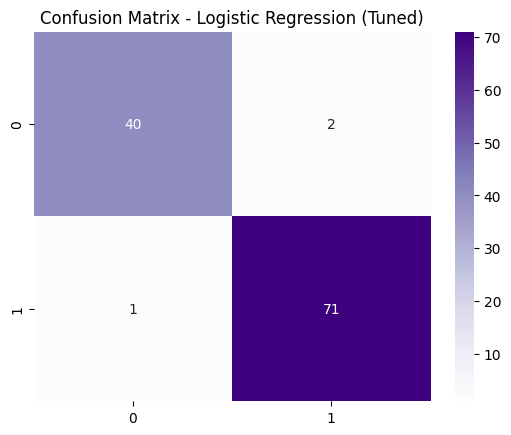

In [86]:
# --- Logistic Regression Fine-Tuning ---
lr = LogisticRegression(max_iter=500)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

y_pred_lr_tuned = best_lr.predict(X_test)
y_prob_lr_tuned = best_lr.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred_lr_tuned)
prec = precision_score(y_test, y_pred_lr_tuned)
rec = recall_score(y_test, y_pred_lr_tuned)
f1 = f1_score(y_test, y_pred_lr_tuned)
roc = roc_auc_score(y_test, y_prob_lr_tuned)

print("=== Logistic Regression (Tuned) ===")
print("Best Parameters:", grid_lr.best_params_)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_lr_tuned), annot=True, fmt='d', cmap="Purples")
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.show()


=== Decision Tree (Tuned) ===
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
Accuracy: 0.9123
Precision: 0.9559
Recall: 0.9028
F1 Score: 0.9286
ROC AUC: 0.9661


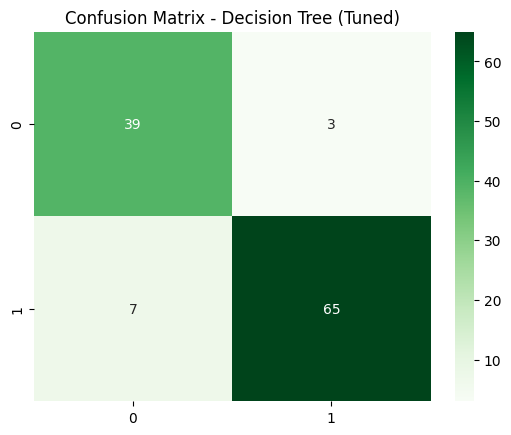

In [87]:
# --- Decision Tree Fine-Tuning ---
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

y_pred_dt_tuned = best_dt.predict(X_test)
y_prob_dt_tuned = best_dt.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred_dt_tuned)
prec = precision_score(y_test, y_pred_dt_tuned)
rec = recall_score(y_test, y_pred_dt_tuned)
f1 = f1_score(y_test, y_pred_dt_tuned)
roc = roc_auc_score(y_test, y_prob_dt_tuned)

print("=== Decision Tree (Tuned) ===")
print("Best Parameters:", grid_dt.best_params_)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_dt_tuned), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Decision Tree (Tuned)")
plt.show()


=== Random Forest (Tuned) ===
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
Accuracy: 0.9561
Precision: 0.9589
Recall: 0.9722
F1 Score: 0.9655
ROC AUC: 0.9904


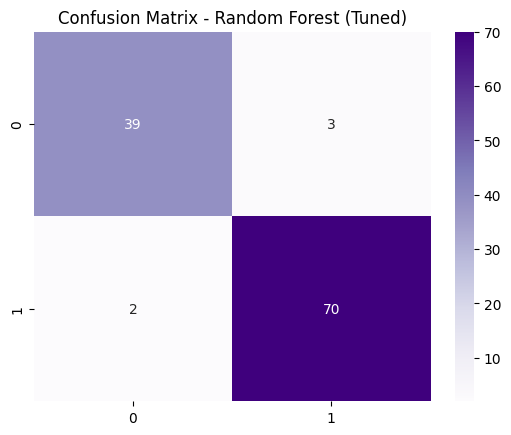

In [88]:
# --- Random Forest Fine-Tuning ---
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
rand_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=30, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
rand_rf.fit(X_train, y_train)
best_rf = rand_rf.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)
y_prob_rf_tuned = best_rf.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred_rf_tuned)
prec = precision_score(y_test, y_pred_rf_tuned)
rec = recall_score(y_test, y_pred_rf_tuned)
f1 = f1_score(y_test, y_pred_rf_tuned)
roc = roc_auc_score(y_test, y_prob_rf_tuned)

print("=== Random Forest (Tuned) ===")
print("Best Parameters:", rand_rf.best_params_)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned), annot=True, fmt='d', cmap="Purples")
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.show()

=== Gradient Boosting (Tuned) ===
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9722
F1 Score: 0.9589
ROC AUC: 0.9927


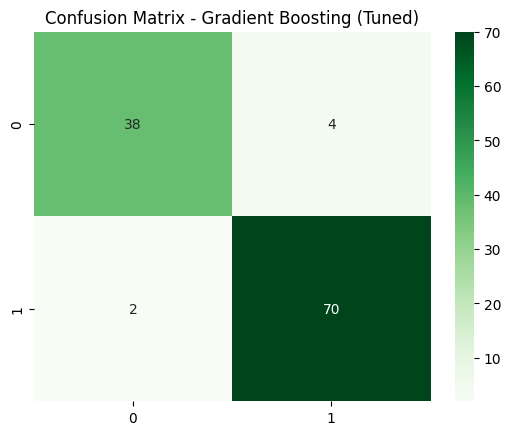

In [89]:
# --- Gradient Boosting Fine-Tuning ---
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}
grid_gb = GridSearchCV(gb, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

y_pred_gb_tuned = best_gb.predict(X_test)
y_prob_gb_tuned = best_gb.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred_gb_tuned)
prec = precision_score(y_test, y_pred_gb_tuned)
rec = recall_score(y_test, y_pred_gb_tuned)
f1 = f1_score(y_test, y_pred_gb_tuned)
roc = roc_auc_score(y_test, y_prob_gb_tuned)

print("=== Gradient Boosting (Tuned) ===")
print("Best Parameters:", grid_gb.best_params_)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_gb_tuned), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Gradient Boosting (Tuned)")
plt.show()


=== KNN (Tuned) ===
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.9474
Precision: 0.9583
Recall: 0.9583
F1 Score: 0.9583
ROC AUC: 0.9797


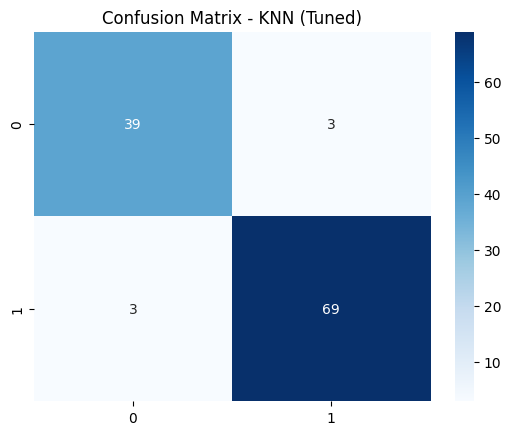

In [90]:
# --- KNN Fine-Tuning ---
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring="accuracy", n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

y_pred_knn_tuned = best_knn.predict(X_test)
y_prob_knn_tuned = best_knn.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred_knn_tuned)
prec = precision_score(y_test, y_pred_knn_tuned)
rec = recall_score(y_test, y_pred_knn_tuned)
f1 = f1_score(y_test, y_pred_knn_tuned)
roc = roc_auc_score(y_test, y_prob_knn_tuned)

print("=== KNN (Tuned) ===")
print("Best Parameters:", grid_knn.best_params_)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_knn_tuned), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - KNN (Tuned)")
plt.show()


=== XGBoost (Tuned) ===
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.7}
Accuracy: 0.9561
Precision: 0.9589
Recall: 0.9722
F1 Score: 0.9655
ROC AUC: 0.9914


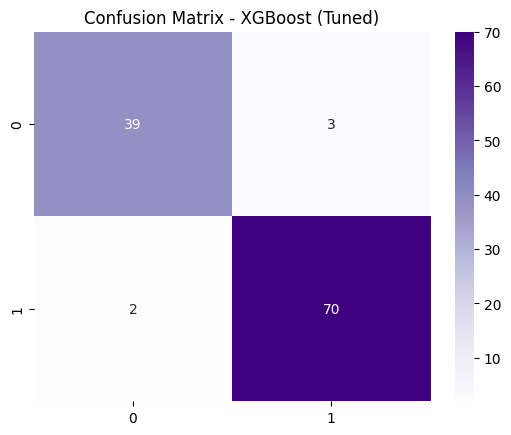

In [91]:
# --- XGBoost Fine-Tuning ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}
random_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=30, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_xgb.fit(X_train, y_train)
best_xgb = random_xgb.best_estimator_

y_pred_xgb_tuned = best_xgb.predict(X_test)
y_prob_xgb_tuned = best_xgb.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred_xgb_tuned)
prec = precision_score(y_test, y_pred_xgb_tuned)
rec = recall_score(y_test, y_pred_xgb_tuned)
f1 = f1_score(y_test, y_pred_xgb_tuned)
roc = roc_auc_score(y_test, y_prob_xgb_tuned)

print("=== XGBoost (Tuned) ===")
print("Best Parameters:", random_xgb.best_params_)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned), annot=True, fmt='d', cmap="Purples")
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.show()


=== SVM (Tuned) ===
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9561
Precision: 0.9589
Recall: 0.9722
F1 Score: 0.9655
ROC AUC: 0.9878


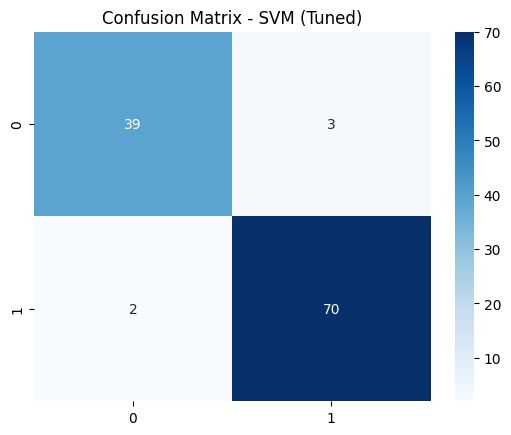

In [92]:
# --- SVM Fine-Tuning ---
svm = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(svm, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

y_pred_svm_tuned = best_svm.predict(X_test)
y_prob_svm_tuned = best_svm.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred_svm_tuned)
prec = precision_score(y_test, y_pred_svm_tuned)
rec = recall_score(y_test, y_pred_svm_tuned)
f1 = f1_score(y_test, y_pred_svm_tuned)
roc = roc_auc_score(y_test, y_prob_svm_tuned)

print("=== SVM (Tuned) ===")
print("Best Parameters:", grid_svm.best_params_)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_svm_tuned), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - SVM (Tuned)")
plt.show()

In [94]:
# -----------------------------
# Collect Metrics - After Hyperparameter Tuning
# -----------------------------
results_after = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "KNN",
        "XGBoost",
        "SVM"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_dt_tuned),
        accuracy_score(y_test, y_pred_rf_tuned),
        accuracy_score(y_test, y_pred_gb_tuned),
        accuracy_score(y_test, y_pred_knn_tuned),
        accuracy_score(y_test, y_pred_xgb_tuned),
        accuracy_score(y_test, y_pred_svm_tuned)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_dt_tuned),
        precision_score(y_test, y_pred_rf_tuned),
        precision_score(y_test, y_pred_gb_tuned),
        precision_score(y_test, y_pred_knn_tuned),
        precision_score(y_test, y_pred_xgb_tuned),
        precision_score(y_test, y_pred_svm_tuned)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_dt_tuned),
        recall_score(y_test, y_pred_rf_tuned),
        recall_score(y_test, y_pred_gb_tuned),
        recall_score(y_test, y_pred_knn_tuned),
        recall_score(y_test, y_pred_xgb_tuned),
        recall_score(y_test, y_pred_svm_tuned)
    ],
    "F1": [
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_dt_tuned),
        f1_score(y_test, y_pred_rf_tuned),
        f1_score(y_test, y_pred_gb_tuned),
        f1_score(y_test, y_pred_knn_tuned),
        f1_score(y_test, y_pred_xgb_tuned),
        f1_score(y_test, y_pred_svm_tuned)
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_prob_lr_tuned),
        roc_auc_score(y_test, y_prob_dt_tuned),
        roc_auc_score(y_test, y_prob_rf_tuned),
        roc_auc_score(y_test, y_prob_gb_tuned),
        roc_auc_score(y_test, y_prob_knn_tuned),
        roc_auc_score(y_test, y_prob_xgb_tuned),
        roc_auc_score(y_test, y_prob_svm_tuned)
    ]
}

# Create DataFrame
results_after_df = pd.DataFrame(results_after)

# Sort by ROC AUC descending
results_after_df = results_after_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

print("📊 Model Comparison Table - Before Hyperparameter Tuning:")
print(results_after_df)

📊 Model Comparison Table - Before Hyperparameter Tuning:
                 Model  Accuracy  Precision    Recall        F1   ROC AUC
0    Gradient Boosting  0.947368   0.945946  0.972222  0.958904  0.992725
1              XGBoost  0.956140   0.958904  0.972222  0.965517  0.991402
2        Random Forest  0.956140   0.958904  0.972222  0.965517  0.990410
3  Logistic Regression  0.973684   0.972603  0.986111  0.979310  0.989749
4                  SVM  0.956140   0.958904  0.972222  0.965517  0.987765
5                  KNN  0.947368   0.958333  0.958333  0.958333  0.979663
6        Decision Tree  0.912281   0.955882  0.902778  0.928571  0.966104


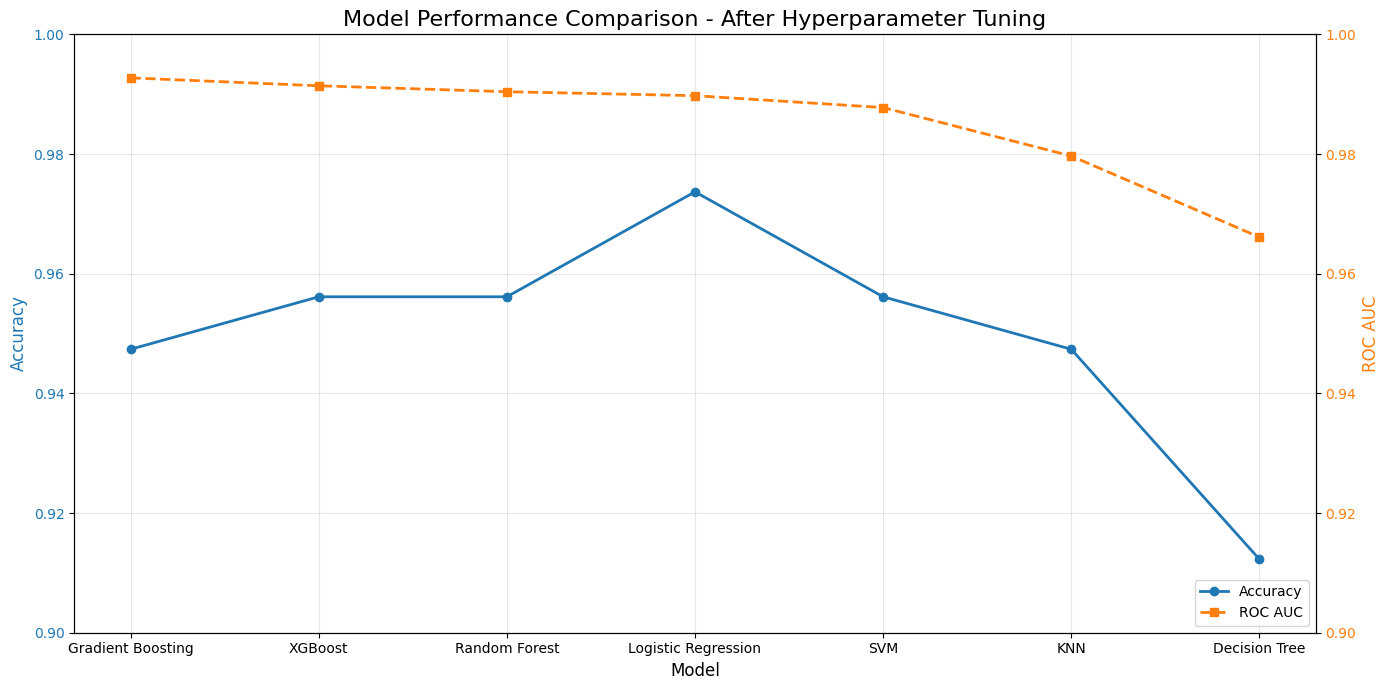

In [104]:
fig, ax1 = plt.subplots(figsize=(14,7))  # wider for clarity

# Primary axis: Accuracy
color_acc = "tab:blue"
ax1.set_xlabel("Model", fontsize=12)
ax1.set_ylabel("Accuracy", color=color_acc, fontsize=12)
ax1.plot(results_after_df["Model"], results_after_df["Accuracy"], marker="o", color=color_acc, linewidth=2, label="Accuracy")
ax1.tick_params(axis="y", labelcolor=color_acc)
ax1.set_ylim(0.90, 1.0)

# Secondary axis: ROC AUC
ax2 = ax1.twinx()
color_auc = "tab:orange"
ax2.set_ylabel("ROC AUC", color=color_auc, fontsize=12)
ax2.plot(results_after_df["Model"], results_after_df["ROC AUC"], marker="s", color=color_auc, linestyle="--", linewidth=2, label="ROC AUC")
ax2.tick_params(axis="y", labelcolor=color_auc)
ax2.set_ylim(0.90, 1.0)

# Add grid only for primary axis
ax1.grid(alpha=0.3)

# Title & Layout
plt.title("Model Performance Comparison - After Hyperparameter Tuning", fontsize=16)
plt.xticks(rotation=30, ha="right")  
fig.tight_layout()

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower right", fontsize=10)

plt.show()

In [ ]:
# -----------------------------
# Collect Metrics - After Hyperparameter Tuning
# -----------------------------
results_after = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "KNN",
        "XGBoost",
        "SVM"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_dt_tuned),
        accuracy_score(y_test, y_pred_rf_tuned),
        accuracy_score(y_test, y_pred_gb_tuned),
        accuracy_score(y_test, y_pred_knn_tuned),
        accuracy_score(y_test, y_pred_xgb_tuned),
        accuracy_score(y_test, y_pred_svm_tuned)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_dt_tuned),
        precision_score(y_test, y_pred_rf_tuned),
        precision_score(y_test, y_pred_gb_tuned),
        precision_score(y_test, y_pred_knn_tuned),
        precision_score(y_test, y_pred_xgb_tuned),
        precision_score(y_test, y_pred_svm_tuned)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_dt_tuned),
        recall_score(y_test, y_pred_rf_tuned),
        recall_score(y_test, y_pred_gb_tuned),
        recall_score(y_test, y_pred_knn_tuned),
        recall_score(y_test, y_pred_xgb_tuned),
        recall_score(y_test, y_pred_svm_tuned)
    ],
    "F1": [
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_dt_tuned),
        f1_score(y_test, y_pred_rf_tuned),
        f1_score(y_test, y_pred_gb_tuned),
        f1_score(y_test, y_pred_knn_tuned),
        f1_score(y_test, y_pred_xgb_tuned),
        f1_score(y_test, y_pred_svm_tuned)
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_prob_lr_tuned),
        roc_auc_score(y_test, y_prob_dt_tuned),
        roc_auc_score(y_test, y_prob_rf_tuned),
        roc_auc_score(y_test, y_prob_gb_tuned),
        roc_auc_score(y_test, y_prob_knn_tuned),
        roc_auc_score(y_test, y_prob_xgb_tuned),
        roc_auc_score(y_test, y_prob_svm_tuned)
    ]
}

# Create DataFrame
results_after_df = pd.DataFrame(results_after)

# Sort by ROC AUC descending
results_after_df = results_after_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

print("📊 Model Comparison Table - Before Hyperparameter Tuning:")
print(results_after_df)

📊 Model Comparison Table - Before Hyperparameter Tuning:
                 Model  Accuracy  Precision    Recall        F1   ROC AUC
0    Gradient Boosting  0.947368   0.945946  0.972222  0.958904  0.992725
1              XGBoost  0.956140   0.958904  0.972222  0.965517  0.991402
2        Random Forest  0.956140   0.958904  0.972222  0.965517  0.990410
3  Logistic Regression  0.973684   0.972603  0.986111  0.979310  0.989749
4                  SVM  0.956140   0.958904  0.972222  0.965517  0.987765
5                  KNN  0.947368   0.958333  0.958333  0.958333  0.979663
6        Decision Tree  0.912281   0.955882  0.902778  0.928571  0.966104


In [103]:
# Define models
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "KNN", "XGBoost", "SVM"]  # Extend for all models if needed

# Metrics for each model before tuning
before_metrics = {
    "Logistic Regression": [accuracy_score(y_test, y_pred_lr),
                            precision_score(y_test, y_pred_lr),
                            recall_score(y_test, y_pred_lr),
                            f1_score(y_test, y_pred_lr),
                            roc_auc_score(y_test, y_prob_lr)],
    
    "Decision Tree": [accuracy_score(y_test, y_pred_dt),
            precision_score(y_test, y_pred_dt),
            recall_score(y_test, y_pred_dt),
            f1_score(y_test, y_pred_dt),
            roc_auc_score(y_test, y_prob_dt)],
    
    "Random Forest": [accuracy_score(y_test, y_pred_rf),
                      precision_score(y_test, y_pred_rf),
                      recall_score(y_test, y_pred_rf),
                      f1_score(y_test, y_pred_rf),
                      roc_auc_score(y_test, y_prob_rf)],
    
    "Gradient Boosting": [accuracy_score(y_test, y_pred_gb),
            precision_score(y_test, y_pred_gb),
            recall_score(y_test, y_pred_gb),
            f1_score(y_test, y_pred_gb),
            roc_auc_score(y_test, y_prob_gb)],
    
    "KNN": [accuracy_score(y_test, y_pred_knn),
            precision_score(y_test, y_pred_knn),
            recall_score(y_test, y_pred_knn),
            f1_score(y_test, y_pred_knn),
            roc_auc_score(y_test, y_prob_knn)],
    
    "XGBoost": [accuracy_score(y_test, y_pred_xgb),
            precision_score(y_test, y_pred_xgb),
            recall_score(y_test, y_pred_xgb),
            f1_score(y_test, y_pred_xgb),
            roc_auc_score(y_test, y_prob_xgb)],
    
    "SVM": [accuracy_score(y_test, y_pred_svm),
            precision_score(y_test, y_pred_svm),
            recall_score(y_test, y_pred_svm),
            f1_score(y_test, y_pred_svm),
            roc_auc_score(y_test, y_prob_svm)]
}

# Metrics after tuning
after_metrics = {
     "Logistic Regression": [accuracy_score(y_test, y_pred_lr_tuned),
                            precision_score(y_test, y_pred_lr_tuned),
                            recall_score(y_test, y_pred_lr_tuned),
                            f1_score(y_test, y_pred_lr_tuned),
                            roc_auc_score(y_test, y_pred_lr_tuned)],
    
    "Decision Tree": [accuracy_score(y_test, y_pred_dt_tuned),
            precision_score(y_test, y_pred_dt_tuned),
            recall_score(y_test, y_pred_dt_tuned),
            f1_score(y_test, y_pred_dt_tuned),
            roc_auc_score(y_test, y_prob_dt_tuned)],
    
    "Random Forest": [accuracy_score(y_test, y_pred_rf_tuned),
                      precision_score(y_test, y_pred_rf_tuned),
                      recall_score(y_test, y_pred_rf_tuned),
                      f1_score(y_test, y_pred_rf_tuned),
                      roc_auc_score(y_test, y_prob_rf_tuned)],
    
    "Gradient Boosting": [accuracy_score(y_test, y_pred_gb_tuned),
            precision_score(y_test, y_pred_gb_tuned),
            recall_score(y_test, y_pred_gb_tuned),
            f1_score(y_test, y_pred_gb_tuned),
            roc_auc_score(y_test, y_prob_gb_tuned)],
    
    "KNN": [accuracy_score(y_test, y_pred_knn_tuned),
            precision_score(y_test, y_pred_knn_tuned),
            recall_score(y_test, y_pred_knn_tuned),
            f1_score(y_test, y_pred_knn_tuned),
            roc_auc_score(y_test, y_prob_knn_tuned)],
    
    "XGBoost": [accuracy_score(y_test, y_pred_xgb_tuned),
            precision_score(y_test, y_pred_xgb_tuned),
            recall_score(y_test, y_pred_xgb_tuned),
            f1_score(y_test, y_pred_xgb_tuned),
            roc_auc_score(y_test, y_prob_xgb_tuned)],
    
    "SVM": [accuracy_score(y_test, y_pred_svm_tuned),
            precision_score(y_test, y_pred_svm_tuned),
            recall_score(y_test, y_pred_svm_tuned),
            f1_score(y_test, y_pred_svm_tuned),
            roc_auc_score(y_test, y_prob_svm_tuned)]
}

# Create multi-index columns: (Model, Before/After)
# Create multi-index columns: (Model, Before/After) with wrapped names for clarity
columns = pd.MultiIndex.from_product(
        [models, ["Before<br>Fine Tuning", "After<br>Fine Tuning"]]
)

# Optionally, set pandas display options for better column width in output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 180)
pd.set_option('display.max_colwidth', 20)


# Combine all metrics into a DataFrame
data = []
for metric_idx in range(5):
    row = []
    for model in models:
        row.append(before_metrics[model][metric_idx])
        row.append(after_metrics[model][metric_idx])
    data.append(row)

comparison_df = pd.DataFrame(data, index=["Accuracy", "Precision", "Recall", "F1", "ROC AUC"], columns=columns)

print("📊 Model Performance Comparison (Before vs After Tuning):")
# Use Styler to render HTML breaks
styled_df = comparison_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('white-space', 'pre-line')]}]
)
display(styled_df)



📊 Model Performance Comparison (Before vs After Tuning):
